In [8]:
# 必要なライブラリのインクルード
import os
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,  Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np# 元となる画像の読み込み
%matplotlib inline

# 関数定義

In [131]:
# opencv画像入力用
from IPython.display import display, Image

def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

def readyForGuess(img_name,width):
    img = cv2.imread( "./img/"+img_name+".jpg", cv2.IMREAD_GRAYSCALE)
    size = (3*width,4*width)
    #Create Small Size Image
    length=size[0]*size[1]
    img = cv2.resize(img, size)
    img_dat = img/255
    img_dat = img_dat.reshape(1,length)
    return img_dat

def showDiff(num):
    print("raw")
    display_cv_image(raw_img[num])
    print("processed")
    display_cv_image(proc_img[num])
    print("diff")
    display_cv_image(diff_img[num])
    

# 画像読み込み

In [216]:
#画像読み込みします
width = 120
size = (3*width,4*width)
length=size[0]*size[1]

raw_img = []
proc_img = []
# diff_img = []

dir = os.getcwd()# カレントディレクトリのパスを取得


#positive
pos_dir = dir+"/img/raw/"
files = os.listdir(pos_dir)# ファイルのリストを取得
for file in files:# ファイルの数だけループ
    index = re.search('.JPG', file)# 拡張子がjpgのものを検出
    if index:# jpgの時だけ
        read_img = cv2.imread( pos_dir+file, cv2.IMREAD_GRAYSCALE)
        read_img = cv2.resize(read_img, size)
        read_img = read_img
        raw_img.append(read_img)
# #negative
neg_dir = dir+"/img/processed/"
files = os.listdir(neg_dir)# ファイルのリストを取得
for file in files:# ファイルの数だけループ
    index = re.search('.JPG', file)# 拡張子がjpgのものを検出
    if index:# jpgの時だけ
        read_img = cv2.imread( neg_dir+file,cv2.IMREAD_GRAYSCALE)
        read_img = cv2.resize(read_img, size)
        read_img = read_img
        proc_img.append(read_img)

# arrayに変換
raw_img = np.asarray(raw_img)
proc_img = np.asarray(proc_img)

# diff_img = raw_img*0 #真っ黒のボックスを作成

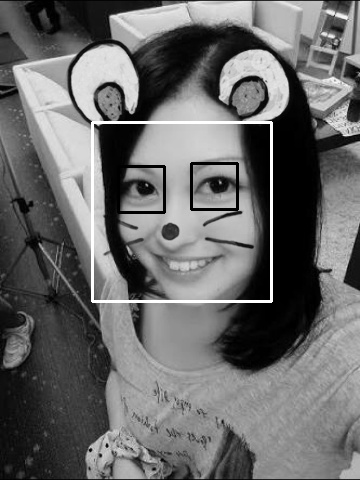

In [218]:
# display_cv_image(proc_img[0])
face_cascade = cv2.CascadeClassifier('/usr/local/Cellar/opencv/3.3.0_3/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/usr/local/Cellar/opencv/3.3.0_3/share/OpenCV/haarcascades/haarcascade_eye.xml')
# 顔を検知

img = proc_img[0]
faces = face_cascade.detectMultiScale(img)

for (x,y,w,h) in faces:
    counter = 0
    # 検知した顔を矩形で囲む
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 顔画像（グレースケール）
    roi_gray = img[y:y+h, x:x+w]
    # 顔ｇ増（カラースケール）
    roi_color = img[y:y+h, x:x+w]
    # 顔の中から目を検知
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        # 検知した目を矩形で囲む
        counter +=1
        if(counter>=3):
            break
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
display_cv_image(img)

In [193]:
# img_03_07 = cv2.addWeighted(raw_img[0], 20, proc_img[0], 20, 2.2)
# cv2.imwrite('img_0.5_0.5.jpg', img_03_07)
raw_img.astype(int) 
proc_img.astype(int)
diff_img = raw_img - proc_img
diff_img = abs(diff_img)
diff_img = np.uint8(diff_img)

raw


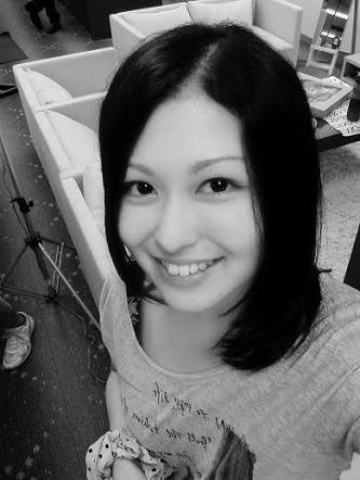

processed


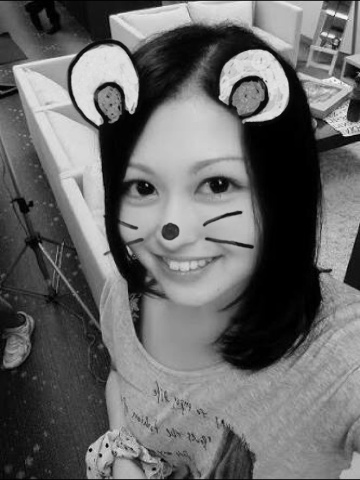

diff


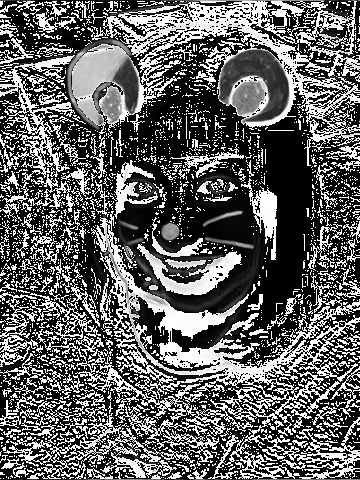

In [165]:
num = 0
showDiff(num)